<a href="https://colab.research.google.com/github/mohankrishnas3/Cloud/blob/main/Cloud_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Units are measured in meters

Highway_Total_distance = 11000

Coverage = 100 

AP0 = 50

AP2 = 2050

AP3 = 4050

AP4 = 6050

AP5 = 8050

AP6 = 10050

## Strategy 1
This strategy can be used when vehicular cloud was implemented on straight highway

In [24]:
import pandas as pd
car_job_information_df = pd.DataFrame(columns=['Vehicle_ID', 'Vehicle_speed','Arrival time','Residency_time_seconds', 'Job_ID_assigned', 'Job_total_completion_time'])

#Maximum highway speed 60 kilometers per hour or 60000 meters per hour
#Highway patrol police make sure that cars entered are not jammed in traffic on highway

import random
import numpy as np
import string
import time


# defining function for random
# string id with parameter
def ran_gen(size, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for x in range(size))

car_job_information_dict = {}

for i in range(100): 
  # function call for random string
  # generation with size 8 and string
  Vehicle_number = ran_gen(8, "AEIOSUMA23")
  car_job_information_dict['Vehicle_ID'] = Vehicle_number

  np.random.seed(random.randint(0,100000))
  Vehicle_arrival_time = random.randint(0,3600) # in seconds
  car_job_information_dict['Arrival time'] = Vehicle_arrival_time


  import time

  # np.random.seed(int(time.time()))
  np.random.seed(random.randint(0,100000))
  In_speed_kilometers_per_hour = abs(np.random.normal(size = 4, loc = 40, scale = 10)[0]) # geneating speed mean = 30 , standard_deviation = 20

  In_speed_meters_per_second = In_speed_kilometers_per_hour * 1000/3600
  car_job_information_dict['Vehicle_speed'] = In_speed_meters_per_second

  Residency_time_seconds = Highway_Total_distance/In_speed_meters_per_second
  car_job_information_dict['Residency_time_seconds'] = Residency_time_seconds

  Job_id_number = ran_gen(3, "AEIOSUMA23")
  Job_size = 10 #mb

  np.random.seed(random.randint(0,100000))
  Job_Processing = abs(np.random.normal(size = 4, loc = 700, scale = 40)[0])  # geneating job processing time mean = 400 , standard_deviation = 40

  Job_download_time = 1 # seconds
  Job_upload_time = 1 # seconds
  Job_total_completion_time = Job_download_time + Job_Processing + Job_upload_time

  if(Residency_time_seconds > Job_total_completion_time):
    job_assigned = Job_id_number
  else:
    job_assigned = 0

  # print("Vehice number is", Vehicle_number)
  # print("Speed of Vehicle entered is", In_speed_kilometers_per_hour, "Km/Hour")
  # print("Residency time of vehicle",Residency_time_seconds, "Seconds")


  if(job_assigned == 0):
    # print("No Job assigned")
    car_job_information_dict['Job_ID_assigned'] = 0
    car_job_information_dict['Job_total_completion_time'] = 0
  else:
    # print("ID of the job assigned is",Job_id_number)
    # print("Size of the job is", Job_size)
    # print("Total Job Processing time", Job_total_completion_time)
    car_job_information_dict['Job_ID_assigned'] = job_assigned
    car_job_information_dict['Job_total_completion_time'] = Job_total_completion_time

  # print(car_job_information_dict)
  car_job_information_df = car_job_information_df.append(car_job_information_dict, ignore_index=True)
  car_job_information_dict.clear()


# car_job_information_df['Residency_time_seconds']=car_job_information_df['Residency_time_seconds'].astype(int)
# car_job_information_df['Job_total_completion_time']=car_job_information_df['Job_total_completion_time'].astype(int)

# print(car_job_information_df)
csv_data = car_job_information_df.to_csv("Car_and_Job_information_strategy_1.csv")

Graph between Residency time and total job completion time

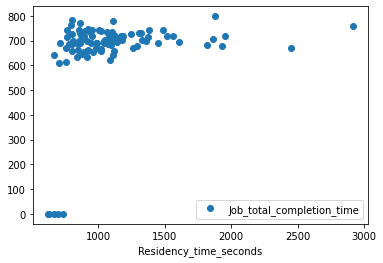

In [25]:
car_job_information_df.plot(x='Residency_time_seconds', y='Job_total_completion_time', style='o')


## Strategy 2
Instead of dropping jobs push jobs into stack which has high job completion time.
When ever vehicle comes calculate residency time of the vechicle and check whether is there any jobs that has total job completion time less than residency time of vehicle and if yes then assign that job on that stack to that vehicle
If no such job is found then assign new job to that vehicle if total job completion time is lesser than residency time of the vehicle

In [26]:
import csv
with open('stack.csv', 'w') as creating_new_csv_file: 
  writer = csv.writer(creating_new_csv_file)
  writer.writerow(['Job_ID_assigned', 'Job_total_completion_time','status']) 
print("Empty File Created Successfully")

import pandas as pd
job_stack_df = pd.DataFrame(columns=['Job_ID_assigned', 'Job_total_completion_time','status'])
car_job_information_df = pd.DataFrame(columns=['Vehicle_ID', 'Vehicle_speed','Arrival time','Residency_time_seconds', 'Job_ID_assigned', 'Job_total_completion_time'])

job_stack_df.drop(job_stack_df.index, inplace=True)
car_job_information_df.drop(car_job_information_df.index, inplace=True)



#Maximum highway speed 60 kilometers per hour or 60000 meters per hour
#Highway patrol police make sure that cars entered are not jammed in traffic on highway

import random
import numpy as np
import string
import time



# defining function for random
# string id with parameter
def ran_gen(size, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for x in range(size))

car_job_information_dict = {}

for i in range(100): 
  # function call for random string
  # generation with size 8 and string
  Vehicle_number = ran_gen(8, "AEIOSUMA23")
  car_job_information_dict['Vehicle_ID'] = Vehicle_number

  np.random.seed(random.randint(0,100000))
  Vehicle_arrival_time = random.randint(0,3600) # in seconds
  car_job_information_dict['Arrival time'] = Vehicle_arrival_time


  import time

  # np.random.seed(int(time.time()))
  np.random.seed(random.randint(0,100000))
  In_speed_kilometers_per_hour = abs(np.random.normal(size = 4, loc = 40, scale = 10)[0]) # geneating speed mean = 30 , standard_deviation = 20

  In_speed_meters_per_second = In_speed_kilometers_per_hour * 1000/3600
  car_job_information_dict['Vehicle_speed'] = In_speed_meters_per_second

  Residency_time_seconds = Highway_Total_distance/In_speed_meters_per_second
  car_job_information_dict['Residency_time_seconds'] = Residency_time_seconds

  found = 0
  with open('stack.csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        print(row)
        if(row[2]=="not_assigned" ):
          print(row[1])
          if(Residency_time_seconds > float(row[1]) ):
            found = 1
            car_job_information_dict['Job_ID_assigned'] = row[0]
            car_job_information_dict['Job_total_completion_time'] = row[1]
  
  if(found == 0):
    Job_id_number = ran_gen(3, "AEIOSUMA23")
    Job_size = 10 #mb

    np.random.seed(random.randint(0,100000))
    Job_Processing = abs(np.random.normal(size = 4, loc = 700, scale = 40)[0])  # geneating job processing time mean = 400 , standard_deviation = 40

    Job_download_time = 1 # seconds
    Job_upload_time = 1 # seconds
    Job_total_completion_time = Job_download_time + Job_Processing + Job_upload_time

    if(Residency_time_seconds > Job_total_completion_time):
      job_assigned = Job_id_number
    else:
      job_assigned = 0
      fields = []
      fields.append(job_assigned)
      fields.append(Job_total_completion_time)
      fields.append("not_assigned") 
      with open(r'stack.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(fields)
        fields.clear()
      # stack_df_refine = pd.read_csv('stack.csv')
      # df_new = stack_df_refine[stack_df_refine["Job_ID_assigned"].str.contains(job_assigned) == False]
      # df_new.to_csv("stack.csv")

    if(job_assigned == 0):
    # print("No Job assigned")
      car_job_information_dict['Job_ID_assigned'] = 0
      car_job_information_dict['Job_total_completion_time'] = 0
    else:
      # print("ID of the job assigned is",Job_id_number)
      # print("Size of the job is", Job_size)
      # print("Total Job Processing time", Job_total_completion_time)
      car_job_information_dict['Job_ID_assigned'] = job_assigned
      car_job_information_dict['Job_total_completion_time'] = Job_total_completion_time



    # print(car_job_information_dict)
    car_job_information_df = car_job_information_df.append(car_job_information_dict, ignore_index=True)
    car_job_information_dict.clear()
    

csv_data = car_job_information_df.to_csv("Car_and_Job_information_strategy_2.csv")



Empty File Created Successfully
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['Job_ID_assigned', 'Job

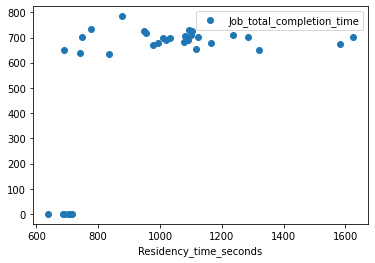

In [27]:
car_job_information_df.plot(x='Residency_time_seconds', y='Job_total_completion_time', style='o')


### Strategy 3
Strategy 3 is same as strategy 2 but you are dividing bigger jobs into 2 jobs and pushing it on stack to make sure job completion time is less than incoming vehicle residency time. When ever vehicle comes calculate residency time of the vechicle and check whether is there any jobs that has total job completion time less than residency time of vehicle and if yes then assign that job on that stack to that vehicle If no such job is found then assign new job to that vehicle if total job completion time is lesser than residency time of the vehicle

In [28]:
import csv
with open('stack_strategy_3.csv', 'w') as creating_new_csv_file: 
  writer = csv.writer(creating_new_csv_file)
  writer.writerow(['Job_ID_assigned', 'Job_total_completion_time','status']) 
print("Empty File Created Successfully")

import pandas as pd
job_stack_df = pd.DataFrame(columns=['Job_ID_assigned', 'Job_total_completion_time','status'])
car_job_information_df = pd.DataFrame(columns=['Vehicle_ID', 'Vehicle_speed','Arrival time','Residency_time_seconds', 'Job_ID_assigned', 'Job_total_completion_time'])

job_stack_df.drop(job_stack_df.index, inplace=True)
car_job_information_df.drop(car_job_information_df.index, inplace=True)



#Maximum highway speed 60 kilometers per hour or 60000 meters per hour
#Highway patrol police make sure that cars entered are not jammed in traffic on highway

import random
import numpy as np
import string
import time



# defining function for random
# string id with parameter
def ran_gen(size, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for x in range(size))

car_job_information_dict = {}

for i in range(500): 
  # function call for random string
  # generation with size 8 and string
  Vehicle_number = ran_gen(8, "AEIOSUMA23")
  car_job_information_dict['Vehicle_ID'] = Vehicle_number

  np.random.seed(random.randint(0,100000))
  Vehicle_arrival_time = random.randint(0,3600) # in seconds
  car_job_information_dict['Arrival time'] = Vehicle_arrival_time


  import time

  # np.random.seed(int(time.time()))
  np.random.seed(random.randint(0,100000))
  In_speed_kilometers_per_hour = abs(np.random.normal(size = 4, loc = 40, scale = 10)[0]) # geneating speed mean = 30 , standard_deviation = 20

  In_speed_meters_per_second = In_speed_kilometers_per_hour * 1000/3600
  car_job_information_dict['Vehicle_speed'] = In_speed_meters_per_second

  Residency_time_seconds = Highway_Total_distance/In_speed_meters_per_second
  car_job_information_dict['Residency_time_seconds'] = Residency_time_seconds

  found = 0
  with open('stack.csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        print(row)
        if(row[2]=="not_assigned" ):
          print(row[1])
          if(Residency_time_seconds > float(row[1]) ):
            found = 1
            car_job_information_dict['Job_ID_assigned'] = row[0]
            car_job_information_dict['Job_total_completion_time'] = row[1]
  
  if(found == 0):
    Job_id_number = ran_gen(3, "AEIOSUMA23")
    Job_size = 10 #mb

    np.random.seed(random.randint(0,100000))
    Job_Processing = abs(np.random.normal(size = 4, loc = 700, scale = 40)[0])  # geneating job processing time mean = 400 , standard_deviation = 40

    Job_download_time = 1 # seconds
    Job_upload_time = 1 # seconds
    Job_total_completion_time = Job_download_time + Job_Processing + Job_upload_time

    if(Residency_time_seconds > Job_total_completion_time):
      job_assigned = Job_id_number
    elif (Residency_time_seconds < Job_total_completion_time):
      print()
      job_assigned = Job_id_number
      Job_Processing_first_half = Job_total_completion_time - Residency_time_seconds - 5
      Job_total_completion_time_first_half = Job_download_time + Job_Processing_first_half + Job_upload_time
      Job_total_completion_time = Job_Processing_first_half
      Job_total_completion_time = Job_total_completion_time_first_half

      Job_id_number_second_half = ran_gen(3, "AEIOSUMA23")
      Job_size = 10 #mb
      Job_Processing_second_half = Job_total_completion_time - Job_total_completion_time_first_half
      fields2 = []
      fields2.append(Job_id_number_second_half)
      fields2.append(Job_Processing_second_half)
      fields2.append("not_assigned") 
      with open(r'stack_strategy_3.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(fields2)
        fields2.clear()
    else:
      job_assigned = 0
      fields = []
      fields.append(job_assigned)
      fields.append(Job_total_completion_time)
      fields.append("not_assigned") 
      with open(r'stack_strategy_3.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(fields)
        fields.clear()
      # stack_df_refine = pd.read_csv('stack.csv')
      # df_new = stack_df_refine[stack_df_refine["Job_ID_assigned"].str.contains(job_assigned) == False]
      # df_new.to_csv("stack.csv")

    if(job_assigned == 0):
    # print("No Job assigned")
      car_job_information_dict['Job_ID_assigned'] = 0
      car_job_information_dict['Job_total_completion_time'] = 0
    else:
      # print("ID of the job assigned is",Job_id_number)
      # print("Size of the job is", Job_size)
      # print("Total Job Processing time", Job_total_completion_time)
      car_job_information_dict['Job_ID_assigned'] = job_assigned
      car_job_information_dict['Job_total_completion_time'] = Job_total_completion_time



    # print(car_job_information_dict)
    car_job_information_df = car_job_information_df.append(car_job_information_dict, ignore_index=True)
    car_job_information_dict.clear()
    

csv_data = car_job_information_df.to_csv("Car_and_Job_information_strategy_2.csv")



Streaming output truncated to the last 5000 lines.
716.0325293549015
['0', '715.4328905186364', 'not_assigned']
715.4328905186364
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '757.8581792486389', 'not_assigned']
757.8581792486389
['0', '749.0856590233402', 'not_assigned']
749.0856590233402
['0', '714.8287674593239', 'not_assigned']
714.8287674593239
['0', '791.1890638288783', 'not_assigned']
791.1890638288783
['0', '716.0325293549015', 'not_assigned']
716.0325293549015
['0', '715.4328905186364', 'not_assigned']
715.4328905186364
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '757.8581792486389', 'not_assigned']
757.8581792486389
['0', '749.0856590233402', 'not_assigned']
749.0856590233402
['0', '714.8287674593239', 'not_assigned']
714.8287674593239
['0', '791.1890638288783', 'not_assigned']
791.1890638288783
['0', '716.0325293549015', 'not_assigned']
716.0325293549015
['0', '715.4328905186364', 'not_assigned']
715.4328905186364
['Job_ID_assigned', 

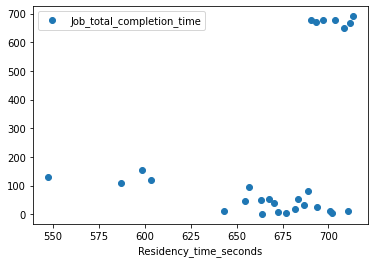

In [29]:
car_job_information_df.plot(x='Residency_time_seconds', y='Job_total_completion_time', style='o')

You can see that for strategy 3 job completion time has decreased a lot compared to strategy 1 and strategy 2.